<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
  
   Lab 1
</div>

# 4 Model

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [50]:
df = pd.read_csv("data/US_Accidents_processed.csv")
time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    df[col]=pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')
    #df[col]=pd.to_datetime(df[col], format='mixed')

## 4.1 Xử lí Outlier bằng IQR

In [51]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

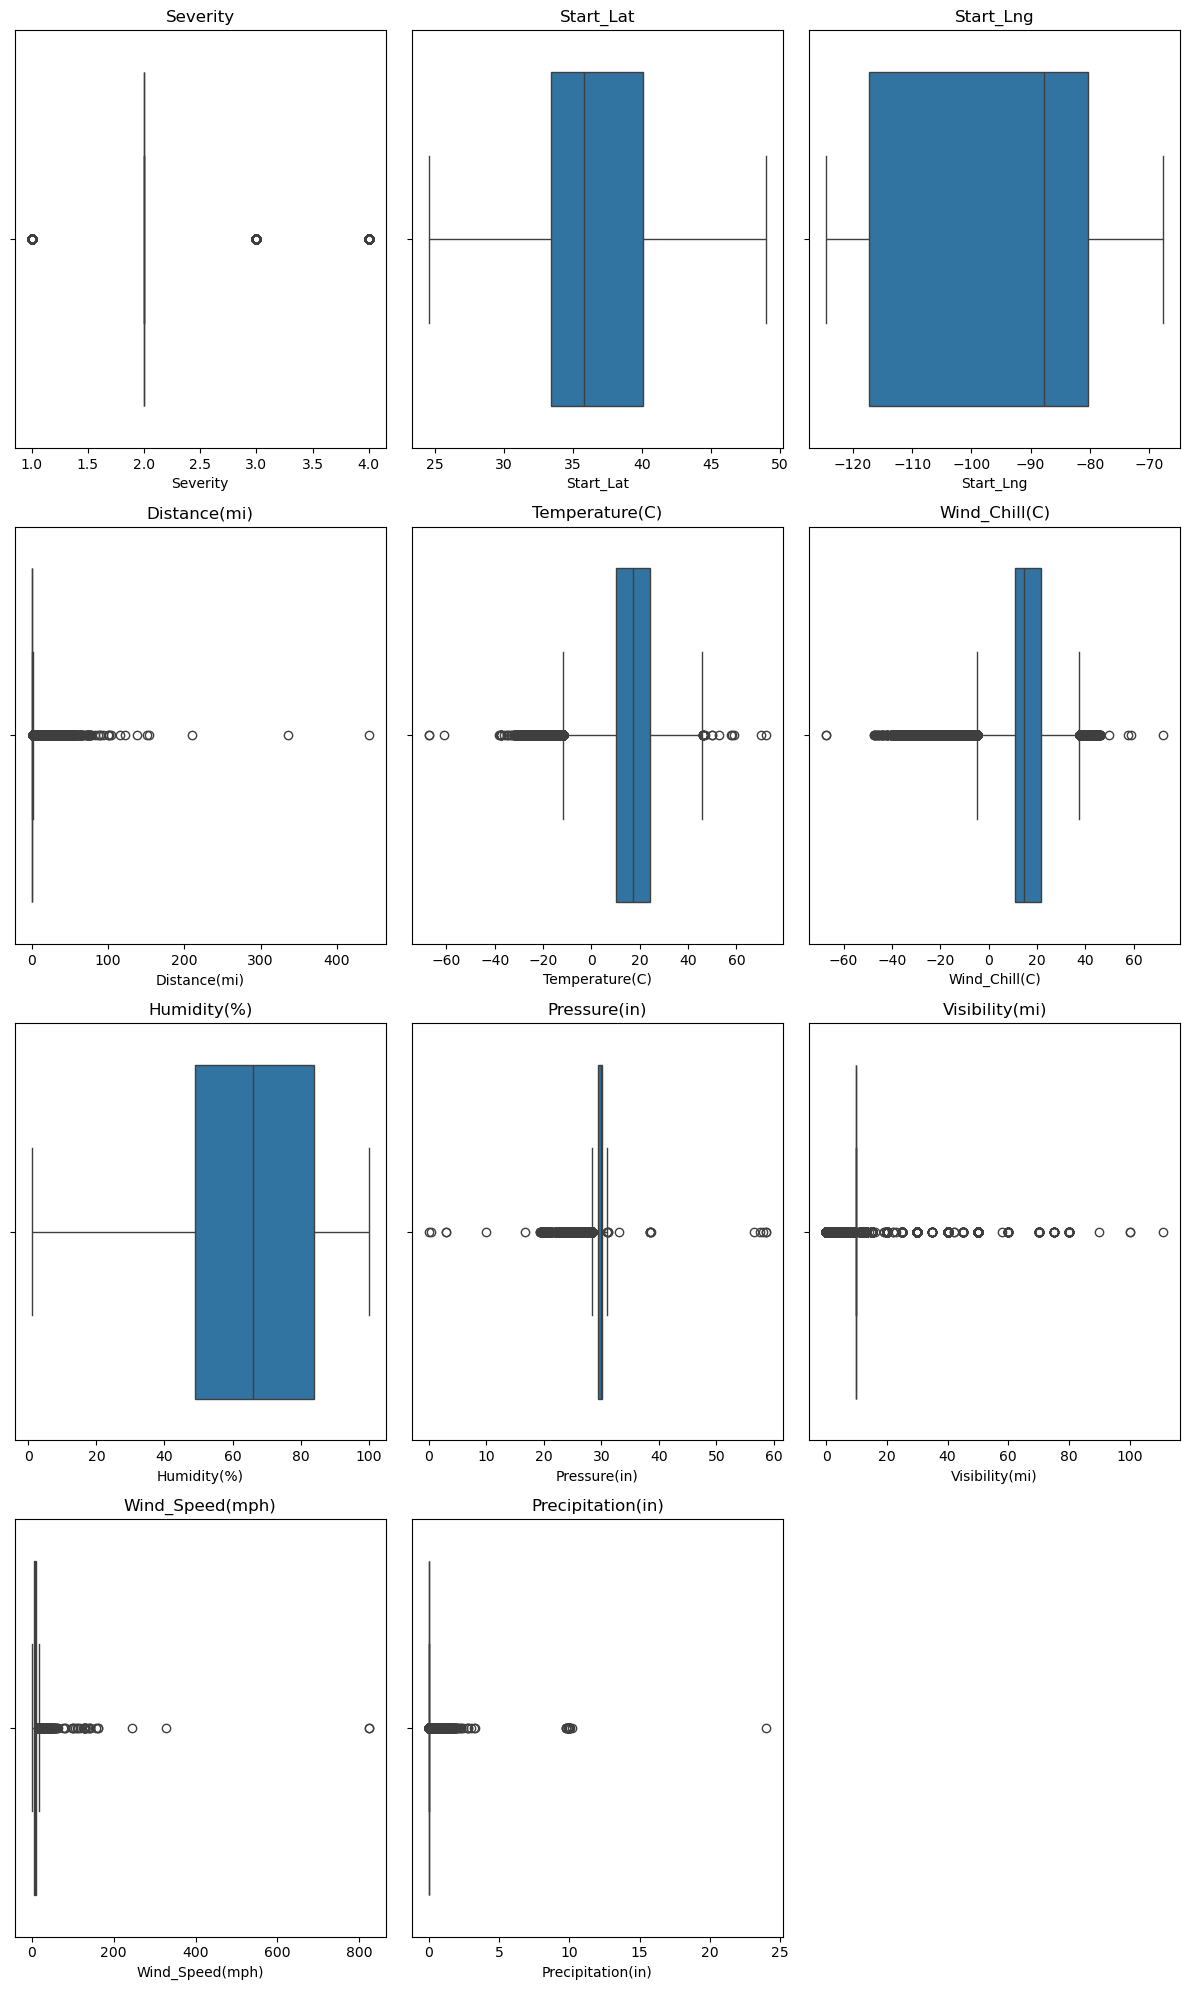

In [52]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

- Cột `Severity` thể hiện mức độ nghiêm trọng, có giá trị từ 1 - 4 nên chúng ta không cần xử lí outlier. 
- Các cột còn lại xử lí outlier bằng IQR.

In [53]:

col_with_outliers = [col for col in numerical_cols if col != 'Severity']

def handle_outlier(col_to_handle: list, df):
    for col in col_to_handle:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        

        IQR = Q3 - Q1
        
        # tính khoảng 1.5 IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with values based on IQR
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df


df = handle_outlier(col_with_outliers, df)

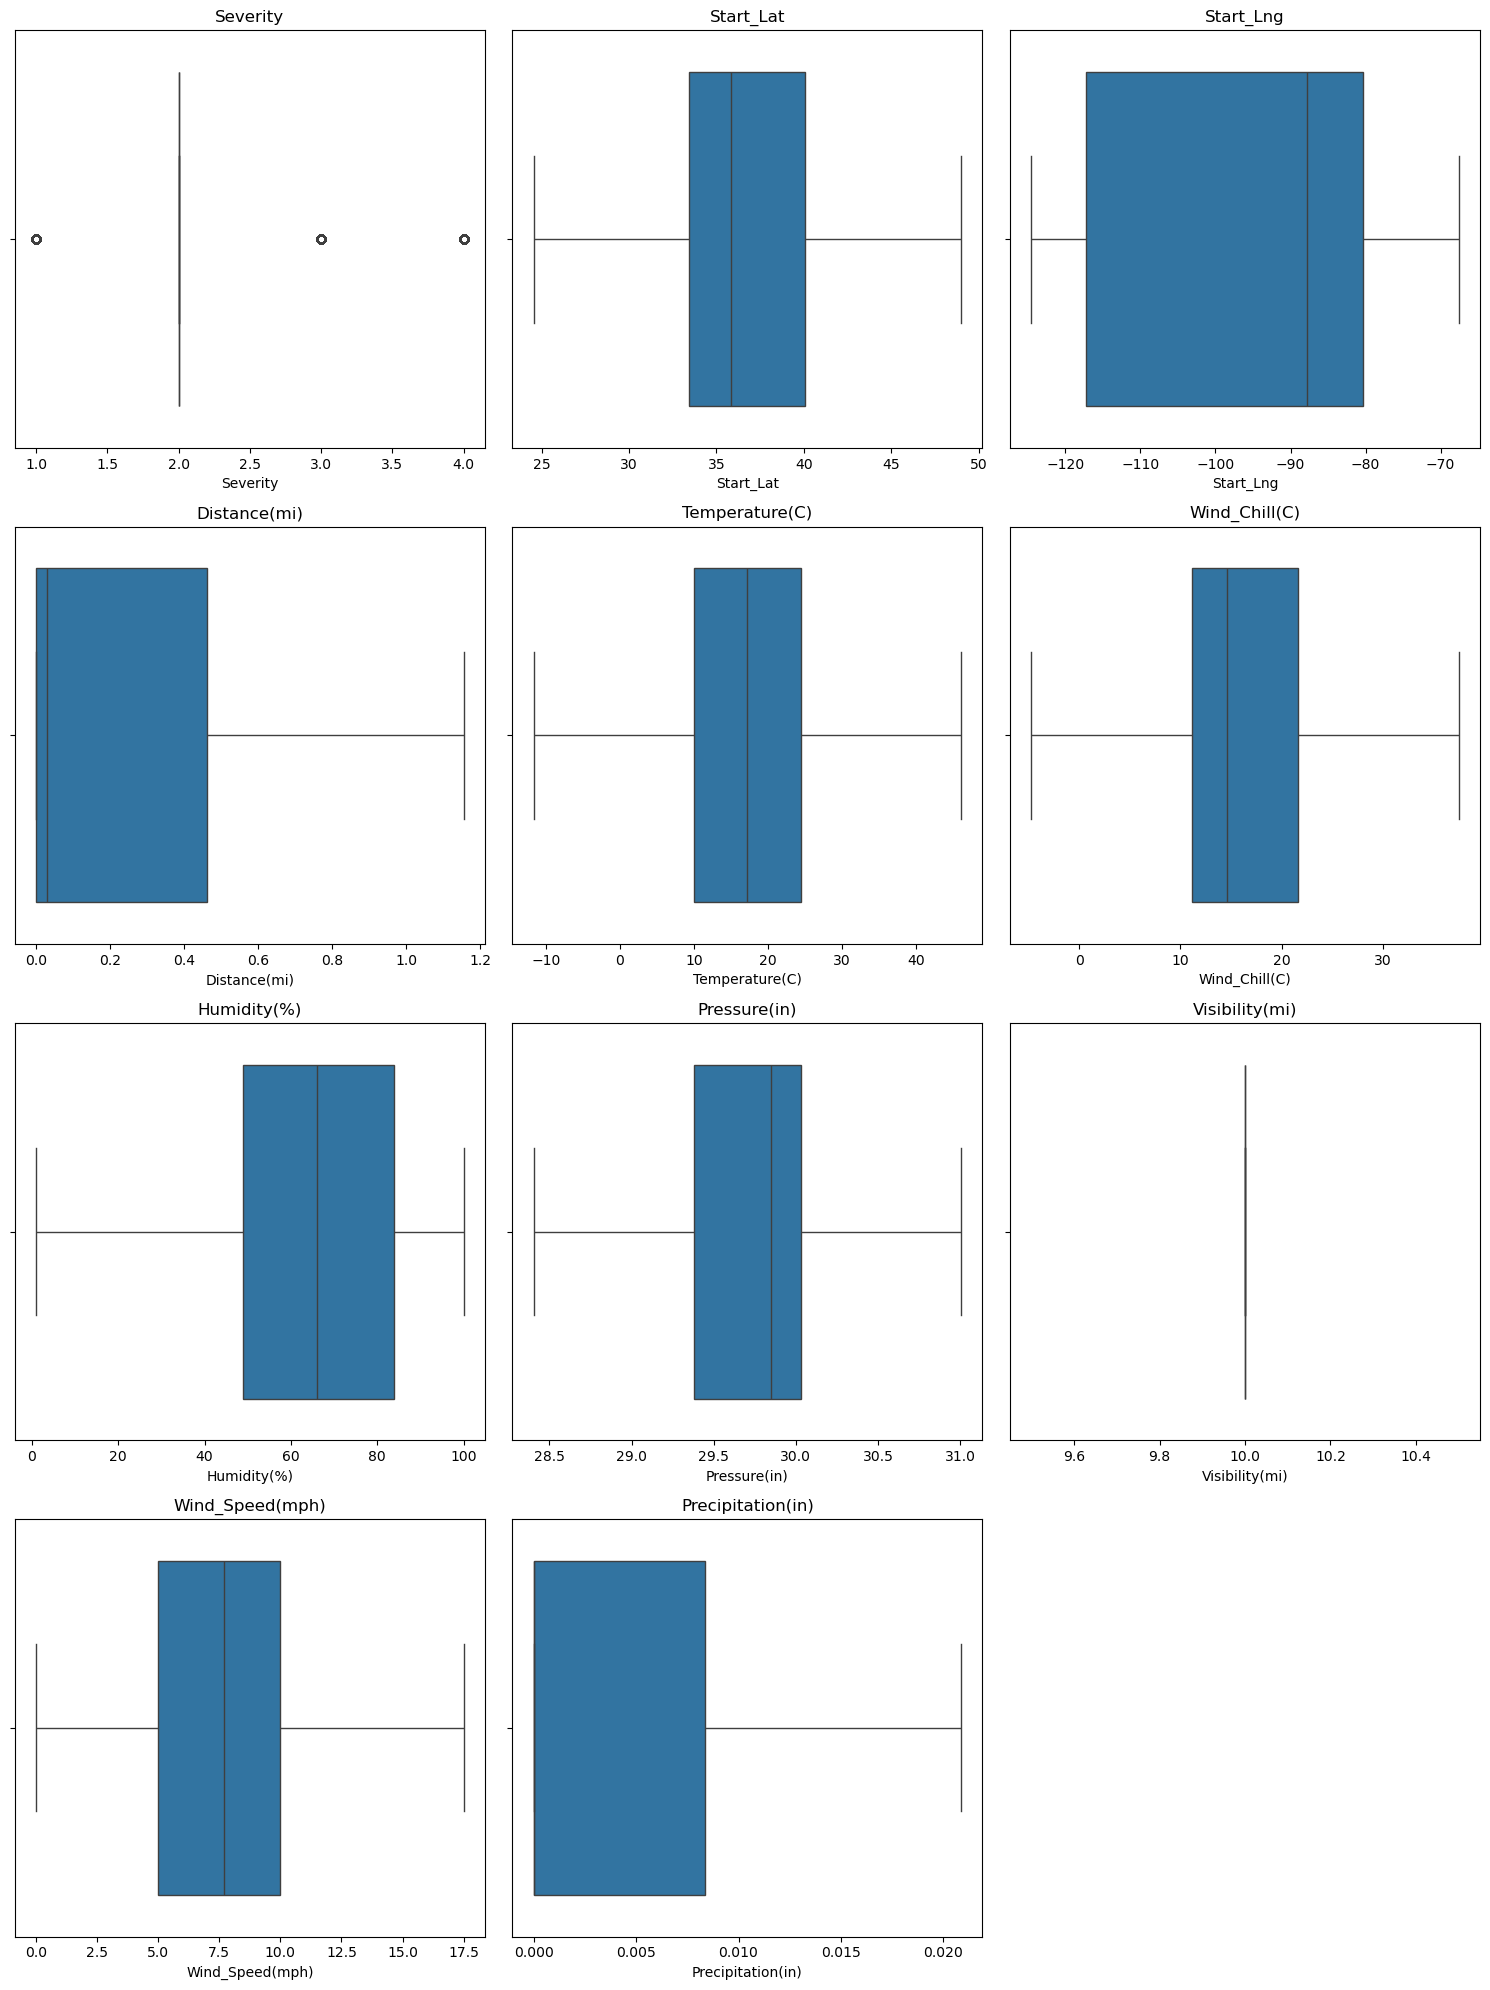

In [54]:
num_cols = 3
num_rows = (len(numerical_cols) - 1) // num_cols + 1

# Tạo figure và axes cho boxplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Lặp qua các cột số để vẽ boxplot
for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_name = col  # Lưu tên cột
    col = i % num_cols
    sns.boxplot(x=df[col_name], ax=axes[row, col]) 
    axes[row, col].set_title(col_name)  

# Xóa các axes dư thừa nếu có
for i in range(len(numerical_cols), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## 4.2 Xử lí Categorical Columns

In [55]:
catecalogical_cols = df.select_dtypes(include=[object,bool]).columns
df[catecalogical_cols].nunique()

City                     10272
County                    1672
State                       49
Timezone                     4
Wind_Direction              24
Weather_Condition          115
Amenity                      2
Bump                         2
Crossing                     2
Give_Way                     2
Junction                     2
No_Exit                      2
Railway                      2
Roundabout                   2
Station                      2
Stop                         2
Traffic_Calming              2
Traffic_Signal               2
Sunrise_Sunset               2
Civil_Twilight               2
Nautical_Twilight            2
Astronomical_Twilight        2
dtype: int64

In [56]:
df[catecalogical_cols].nunique()

City                     10272
County                    1672
State                       49
Timezone                     4
Wind_Direction              24
Weather_Condition          115
Amenity                      2
Bump                         2
Crossing                     2
Give_Way                     2
Junction                     2
No_Exit                      2
Railway                      2
Roundabout                   2
Station                      2
Stop                         2
Traffic_Calming              2
Traffic_Signal               2
Sunrise_Sunset               2
Civil_Twilight               2
Nautical_Twilight            2
Astronomical_Twilight        2
dtype: int64

- Nhận thấy có các cột có từ 2 đến 4 giá trị khác nhau, ta có thể thực hiện mã hoá bằng `One Hot Encoding.`
- Đối với các cột có nhiều phần tử hơn, mã hoá bằng cách trên có thể làm dữ liệu phức tạp và gây ra hiệu suất thấp của mô hình .Do đó để mã hoá các cột này, ta thực hiện cách mã hoá `K-fold Encoding.`

In [81]:
#Import các thư viện hỗ trợ mã hoá
from sklearn.preprocessing import OneHotEncoder 
from utils import KFoldTargetEncoderTrain 

In [86]:
X_train= {
    'Neighborhood': ['N1', 'N2', 'N1', 'N3', 'N2', 'N3', 'N1', 'N2', 'N3', 'N1'],
    'Price': [210000, 320000, 215000, 198000, 265000, 225000, 240000, 280000, 290000, 230000]
}
X_train = pd.DataFrame(X_train)
a=KFoldTargetEncoderTrain('Neighborhood','Price',n_fold=5,verbosity=True,discardOriginal_col=False)
a.transform(X_train)